In [1]:
import numpy as np
import matplotlib.pyplot as plt
from triUtils import *
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
mesh = o3d.io.read_triangle_mesh("test.ply")
verts, tris = np.asarray(mesh.vertices), np.asarray(mesh.triangles)

In [3]:
tri_normals, tri_areas = compute_triangle_normals(verts, tris, return_areas=True)
vert_normals = compute_vertex_normals(verts, tris)
vert_barycentric_areas = compute_vertex_barycentric_areas(verts, tris, tri_areas)

In [7]:
M_taubin = compute_taubin_matrices(verts, tris, vert_normals, tri_areas)

In [8]:
kappa_1, kappa_2 = compute_taubin_principal_curvatures(M_taubin, vert_normals)

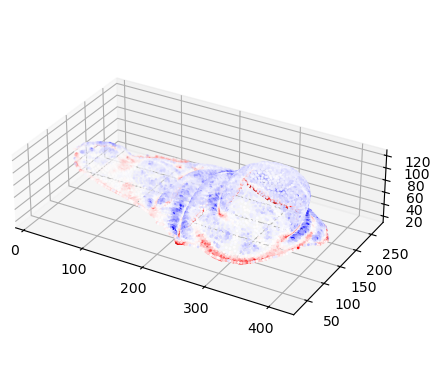

In [9]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(verts[:,1], verts[:,2], verts[:,0], c=(kappa_1+kappa_2)/2,s=1, vmin=-0.25, vmax=0.25, cmap='seismic')
ax.set_aspect('equal')
plt.show()